In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pylaxz

In [2]:
img = cv2.imread('predicted.jpg')

In [3]:
h,w,c = img.shape

In [4]:
blur = cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (21,21), 0)

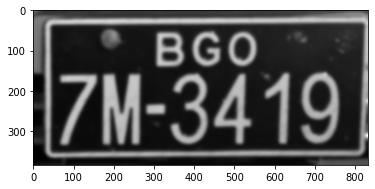

In [7]:
plt.imshow(blur, cmap='gray')

In [8]:
binary = cv2.threshold(src=blur, thresh=125, maxval=255, type=cv2.THRESH_OTSU)[1]

In [12]:
dila_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dila_img = cv2.morphologyEx(binary, cv2.MORPH_DILATE, dila_kernel)

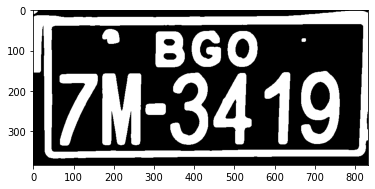

In [13]:
plt.imshow(dila_img, cmap='gray')

In [16]:
import test_utilsx as utilsx

In [28]:
upper = dila_img[30:145]
lower = dila_img[145:350]

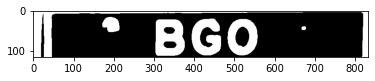

In [29]:
plt.imshow(upper, cmap='gray')

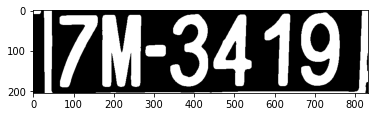

In [30]:
plt.imshow(lower, cmap='gray')

In [59]:
u_cnts, _  = cv2.findContours(lower, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [60]:
_

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [61]:
u_bbs = [cv2.boundingRect(c) for c in cont]

In [62]:
pylaxz.printf(u_bbs[0], u_bbs[1])

In [64]:
(cnts, bbs) = zip(*sorted(zip(u_cnts, u_bbs),key=lambda b:b[1][0], reverse=False)) # [1][0] left to right

In [67]:
sorted(zip(u_cnts, u_bbs),key=lambda b:b[1][0], reverse=False)[0]

(array([[[ 0,  0]],
 
        [[ 0,  9]],
 
        [[16,  9]],
 
        [[18,  7]],
 
        [[18,  6]],
 
        [[19,  5]],
 
        [[19,  0]]], dtype=int32),
 (0, 0, 20, 10))

In [68]:
sorted(zip(u_cnts, u_bbs),key=lambda b:b[1][0], reverse=False)[1]

(array([[[ 27,   0]],
 
        [[ 27,  18]],
 
        [[ 28,  19]],
 
        [[ 28, 152]],
 
        [[ 29, 153]],
 
        [[ 29, 204]],
 
        [[ 48, 204]],
 
        [[ 46, 202]],
 
        [[ 46, 200]],
 
        [[ 45, 199]],
 
        [[ 45, 146]],
 
        [[ 46, 145]],
 
        [[ 46,  90]],
 
        [[ 47,  89]],
 
        [[ 47,  63]],
 
        [[ 46,  62]],
 
        [[ 46,   0]]], dtype=int32),
 (27, 0, 22, 205))